#### Time for an exercise session on the Data Manipulation. We will continue working with the wine dataset.

Columns in the dataset:
- "country": Country of which the wine was produced
- "description": Description of the taste (qualitative)
- "designation": Amount of points a profesisonal wine taster rated the wine
- "points": Points rated by the wine taster (quantitative)
- "price": Selling price of the wine
- "province": Province of the country which the wine originates from
- "region_1": One entry of which region the wine originates from
- "region_2": Another entry of which region the wine originates from
- "taster_name": Name of the professional wine taster who rated the wine
- "taster_twitter_handle": Twitter username of the professional wine taster
- "title": Competition of which the wine taster tasted the wine
- "variety": Category of wine

#### Start with loading the dataset from the data subfolder

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("data/wine.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Check if there are any wines from Italy which did not score more than 85 points.

In [2]:
mask_1 = (df["country"] == "Italy")
mask_2 = (df["points"] < 85)

print(f"There are {np.sum(mask_1 * mask_2)} wines from Italy with a rating below 85. Here is the last five entries")

df[(mask_1 & mask_2)].tail()

There are 860 wines from Italy with a rating below 85. Here is the last five entries


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
128400,Italy,"Funky aromas recall barnyard, wet earth and ov...",Versace,84,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Feudi del Pisciotto 2012 Versace Nero d'Avola ...,Nero d'Avola,Feudi del Pisciotto
128404,Italy,Aromas suggest cut flowers past their prime an...,Salipetrj,84,25.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Armosa 2012 Salipetrj Moscato (Sicilia),Moscato,Armosa
128405,Italy,"Made with organically farmed grapes, this simp...",Gerbino Rosato,84,16.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Di Giovanna 2013 Gerbino Rosato Nero d'Avola (...,Nero d'Avola,Di Giovanna
129610,Italy,"La Fagiana is a bright, ruby-colored wine with...",La Fagiana,84,NaN,Tuscany,Toscana,NaN,NaN,NaN,Fattoria di San Quintino 2008 La Fagiana Red (...,Red Blend,Fattoria di San Quintino
129626,Italy,"Vintner Carlo Cattaneo offers a lean, crisp ex...",Prelato di Massanera,84,35.0,Tuscany,Toscana,NaN,NaN,NaN,Massanera 2005 Prelato di Massanera Sangiovese...,Sangiovese,Massanera


#### Additional: Lets inspect it visually

C:\Users\Const\AppData\Local\Temp/ipykernel_25604/3925672272.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


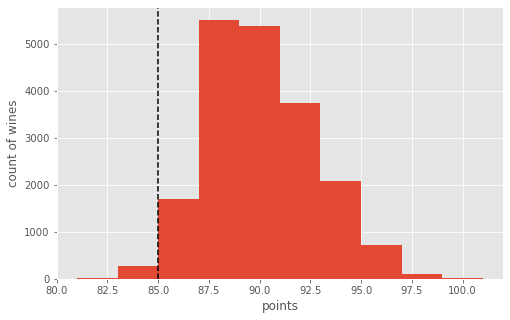

In [3]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

data_for_plot = df[(mask_1)]["points"]

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(data_for_plot, align="right")
ax.axvline(85, color='k', linestyle="--")
ax.set_xlabel("points")
ax.set_ylabel("count of wines")
fig.show()


We see that there is indeed entries for Italian wines (mask_1 == "Italy") with less than 85 points.

#### If there are some, which variety is most represented among them? Please do not copy the name that you "see" has the greatest representation, but rather extract it from the dataset. Remember: Copying enhances the change of a human mistake!

In [4]:
df_grouped = df[(mask_1 & mask_2)][["variety"]].groupby("variety").size().sort_values(ascending=False).head(1)
df_grouped

variety
Sangiovese    102
dtype: int64

In [5]:
variety_w_lowest_points = list(df_grouped.tail(1).index)
variety_w_lowest_points

['Sangiovese']

In [6]:
stringOfLowestPoints = variety_w_lowest_points[0]

#### Since this variety has been rated so poorly... 
- We reduce the price for all the Italian wines from this variety by 20%...
- ... and create a new columns called "sales_title", adding: "SALE " in the beginning of each Title for these wines and "NOT ON SALE" to the remaining ones.

In [7]:
df = df[mask_1].copy()

df["price"] = np.where(df["variety"] == stringOfLowestPoints, .8 * df["price"], df["price"])
df["sales_title"] = np.where(df["variety"] == stringOfLowestPoints, "SALE:", "NOT ON SALES:")

df 


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,sales_title
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NOT ON SALES:
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,NOT ON SALES:
13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte,NOT ON SALES:
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,NOT ON SALES:
24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,NOT ON SALES:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129929,Italy,"This luminous sparkler has a sweet, fruit-forw...",NaN,91,38.0,Veneto,Prosecco Superiore di Cartizze,NaN,NaN,NaN,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Col Vetoraz Spumanti,NOT ON SALES:
129943,Italy,"A blend of Nero d'Avola and Syrah, this convey...",Adènzia,90,29.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio del Cristo di Campobello 2012 Adènzia R...,Red Blend,Baglio del Cristo di Campobello,NOT ON SALES:
129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera,NOT ON SALES:
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS,NOT ON SALES:
